# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import pprint
from datetime import date
from decimal import Decimal


# Import API key
import api_keys

# Import citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output_Data/weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for coordinates in lat_lngs:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
# Replace spaces with "_" to create url correctly 
    city = city.replace(" ", "_")    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Openweather map API key
api_key = api_keys.api_key

In [4]:
#Create a function to get json value
def get_weather_json(city, api_key):
    url = "http://api.openweathermap.org/data/2.5/forecast"
    r = requests.get(url, params={
        "appid": api_key,
        "q": city,
        "units": "imperial"
    })
    if r.status_code ==200:
        r_json = r.json()
        return r_json
    else:
        return None

In [5]:
# Print the output json values
pprint.pprint(get_weather_json(city,api_key),indent =4)

{   'city': {   'coord': {'lat': 11.7771, 'lon': -72.447},
                'country': 'CO',
                'id': 3675504,
                'name': 'Manaure',
                'population': 9703,
                'sunrise': 1578395503,
                'sunset': 1578436777,
                'timezone': -18000},
    'cnt': 40,
    'cod': '200',
    'list': [   {   'clouds': {'all': 0},
                    'dt': 1578387600,
                    'dt_txt': '2020-01-07 09:00:00',
                    'main': {   'feels_like': 79.9,
                                'grnd_level': 1011,
                                'humidity': 81,
                                'pressure': 1012,
                                'sea_level': 1012,
                                'temp': 78.94,
                                'temp_kf': 0,
                                'temp_max': 78.94,
                                'temp_min': 78.94},
                    'sys': {'pod': 'n'},
                    'weather': [   {

                                'temp_max': 78.64,
                                'temp_min': 78.64},
                    'sys': {'pod': 'd'},
                    'weather': [   {   'description': 'few clouds',
                                       'icon': '02d',
                                       'id': 801,
                                       'main': 'Clouds'}],
                    'wind': {'deg': 88, 'speed': 22.32}},
                {   'clouds': {'all': 0},
                    'dt': 1578582000,
                    'dt_txt': '2020-01-09 15:00:00',
                    'main': {   'feels_like': 80.15,
                                'grnd_level': 1016,
                                'humidity': 77,
                                'pressure': 1016,
                                'sea_level': 1016,
                                'temp': 80.42,
                                'temp_kf': 0,
                                'temp_max': 80.42,
                                'tem

In [6]:
# Declare the list of elements for data frame
out_cities = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []
date_yyyymmdd = [] # Added new field to get date in format (YYYY-MM-DD)

In [7]:
# Set the initial values for set and record variables
record = 0
set = 1

# Print the output as per the required output
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for in_city in cities:
    response = get_weather_json(in_city.replace(" ", "_"), api_key)
    
    if response:
        # Append the values for all DataFrame variables 
        cloudiness.append(response['list'][0]['clouds']['all'])
        city_data = response['city']
        country.append(city_data['country'])
        date.append(response['list'][0]["dt"])
        date_yyyymmdd.append(response['list'][0]["dt_txt"])
        humidity.append(response['list'][0]['main']['humidity'])
        latitude.append(Decimal(city_data['coord']['lat']).quantize(Decimal(10) ** -2  ))
        longitude.append(Decimal(city_data['coord']['lon']).quantize(Decimal(10) ** -2  ))
        max_temp.append(Decimal(response['list'][0]['main']['temp_max']).quantize(Decimal(10) ** -2  ))
        wind_speed.append(response['list'][0]['wind']['speed'])
        # Check to increment the value of set as per the required output and append the cities for DataFrame
        if record > 49:
            record = 1
            set += 1
            out_cities.append(in_city)
        else:
            record += 1
            out_cities.append(in_city)
        print(f"Processing Record {record} of Set {set} | {in_city}")
    # Check if the city is not in the list
    else:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------") 
        

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | aloleng
Processing Record 2 of Set 1 | pisco
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | mataura
City not found. Skipping...
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | busselton
City not found. Skipping...
Processing Record 9 of Set 1 | moerai
Processing Record 10 of Set 1 | tuktoyaktuk
City not found. Skipping...
Processing Record 11 of Set 1 | torbay
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | butaritari
City not found. Skipping...
Processing Record 14 of Set 1 | bandarbeyla
Processing Record 15 of Set 1 | bagrami
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | canutama
Processing Record 18 of Set 1 | bubaque
Processing Record 19 of Set 1 | shimoda
Processing Record 20 of Set 1 | bluff
City not found. Skipping...
City no

Processing Record 7 of Set 4 | gornyak
City not found. Skipping...
Processing Record 8 of Set 4 | fayaoue
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 9 of Set 4 | touros
City not found. Skipping...
Processing Record 10 of Set 4 | victoria
Processing Record 11 of Set 4 | kavaratti
City not found. Skipping...
Processing Record 12 of Set 4 | dayong
City not found. Skipping...
City not found. Skipping...
Processing Record 13 of Set 4 | dicabisagan
Processing Record 14 of Set 4 | muli
Processing Record 15 of Set 4 | mocuba
Processing Record 16 of Set 4 | meulaboh
Processing Record 17 of Set 4 | nguru
City not found. Skipping...
Processing Record 18 of Set 4 | salinopolis
City not found. Skipping...
Processing Record 19 of Set 4 | honningsvag
City not found. Skipping...
Processing Record 20 of Set 4 | kargasok
Processing Record 21 of Set 4 | zaysan
Processing Record 22 of Set 4 | butzow
Processing Record 23 of Set 4 | seymchan
Process

Processing Record 20 of Set 7 | roma
Processing Record 21 of Set 7 | seydi
City not found. Skipping...
Processing Record 22 of Set 7 | utica
Processing Record 23 of Set 7 | harper
Processing Record 24 of Set 7 | saint-augustin
City not found. Skipping...
Processing Record 25 of Set 7 | sorsk
Processing Record 26 of Set 7 | acajutla
Processing Record 27 of Set 7 | avera
Processing Record 28 of Set 7 | jay
Processing Record 29 of Set 7 | lovington
Processing Record 30 of Set 7 | tiznit
Processing Record 31 of Set 7 | noumea
Processing Record 32 of Set 7 | westport
Processing Record 33 of Set 7 | bambanglipuro
Processing Record 34 of Set 7 | amazar
Processing Record 35 of Set 7 | shar
Processing Record 36 of Set 7 | lupiro
City not found. Skipping...
Processing Record 37 of Set 7 | nuuk
Processing Record 38 of Set 7 | sabha
Processing Record 39 of Set 7 | jacareacanga
Processing Record 40 of Set 7 | marystown
Processing Record 41 of Set 7 | lubango
Processing Record 42 of Set 7 | sibenik


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Set the dictionary for the DataFrame

weather_datadict = {
            "City": out_cities,
            "Cloudiness": cloudiness,
            "Country": country,
            "Date": date,
            "Humidity": humidity ,
            "Lat": latitude ,
            "Lng": longitude ,
            "Max Temp": max_temp ,
            "Wind Speed": wind_speed  
            
            }    

In [9]:
# Convert to DataFrame and display the DataFrame as per the requirement
df_weather = pd.DataFrame(weather_datadict)
df_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,aloleng,24,PH,1578387600,69,16.13,119.78,80.73,5.88
1,pisco,12,PE,1578387600,93,-13.71,-76.20,65.88,1.14
2,ushuaia,100,AR,1578387600,98,-54.81,-68.31,50.95,5.08
3,mataura,99,NZ,1578387600,97,-46.19,168.86,48.54,4.85
4,albany,76,US,1578387600,82,42.65,-73.75,29.17,4.63


In [10]:
# Set the dictionary for the DataFrame with date format YYYY-MM-DD

weather_dict_new_dict= {
            "City": out_cities,
            "Cloudiness": cloudiness,
            "Country": country,
            "Date(YYYY-MM-DD)": date_yyyymmdd,
            "Humidity": humidity ,
            "Lat": latitude ,
            "Lng": longitude ,
            "Max Temp": max_temp ,
            "Wind Speed": wind_speed  
            
            }    

In [11]:
# Convert to the DataFrame 
newweather_df = pd.DataFrame(weather_dict_new_dict)

In [12]:
# format the date column
newweather_df["Date(YYYY-MM-DD)"] = newweather_df["Date(YYYY-MM-DD)"].str[:11]

In [13]:
# Display the new DataFrame 
newweather_df.head()

,City,Cloudiness,Country,Date(YYYY-MM-DD),Humidity,Lat,Lng,Max Temp,Wind Speed
0,aloleng,24,PH,2020-01-07,69,16.13,119.78,80.73,5.88
1,pisco,12,PE,2020-01-07,93,-13.71,-76.20,65.88,1.14
2,ushuaia,100,AR,2020-01-07,98,-54.81,-68.31,50.95,5.08
3,mataura,99,NZ,2020-01-07,97,-46.19,168.86,48.54,4.85
4,albany,76,US,2020-01-07,82,42.65,-73.75,29.17,4.63


In [14]:
# Save the output to a csv file "weather_data.csv"
df_weather.to_csv('Output_Data/weather_data.csv')

In [15]:
df_weather.to_csv('Output_Data/weather_data_updated_date.csv')

In [16]:
# Display the count of all the variables
df_weather.count()

City          443
Cloudiness    443
Country       443
Date          443
Humidity      443
Lat           443
Lng           443
Max Temp      443
Wind Speed    443
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [17]:
from datetime import date
today_date = date.today().strftime('%m/%d/%Y') 
today_date

'01/07/2020'

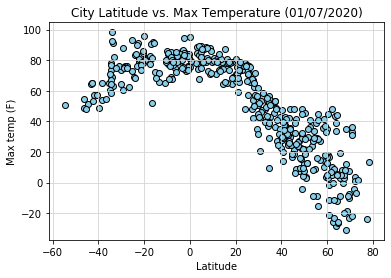

In [18]:
plt.scatter(df_weather["Lat"], df_weather["Max Temp"], edgecolors = "black", facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature ("+ today_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max temp (F)")
#plt.xlim(-80,100)
#plt.ylim(min(df_weather["Max Temp"])-20 ,max(df_weather["Max Temp"])+20)
plt.grid(b = True, which = "major", axis = "both", linestyle = "-", color= "lightgrey")

#plt.savefig("LatitudeVsTemperaturePlot.png")
plt.savefig("Output_Plots/LatitudeVsTemperaturePlot.pnge.png")
plt.show()


#### Latitude vs. Humidity Plot

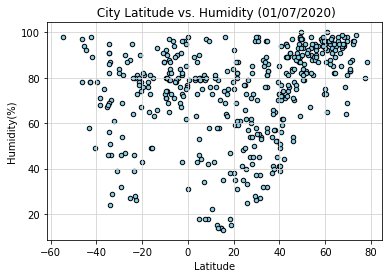

In [19]:
plt.scatter(df_weather["Lat"], df_weather["Humidity"], edgecolors = "black", facecolors="skyblue", s=20)
#plt.xlim(-60, 80)
#plt.ylim(0, 100)
plt.title(" City Latitude vs. Humidity (" + today_date + ")" ) 
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(b = True, which = "major", axis = "both", linestyle = "-", color= "lightgrey")

plt.savefig("Output_Plots/LatitudeVsHumidityPlot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

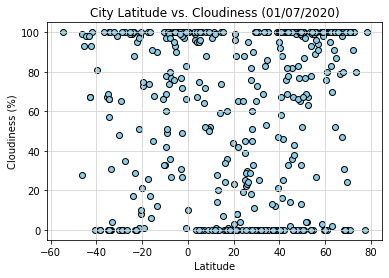

In [20]:
plt.scatter(df_weather["Lat"], df_weather["Cloudiness"], edgecolors = "black", facecolors="skyblue")
#plt.xlim(-60, 80)
#plt.ylim(0, 100)
plt.title("City Latitude vs. Cloudiness (" + today_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b = True, which = "major", axis = "both", linestyle = "-", color= "lightgrey")

plt.savefig("Output_Plots/LatitudeVsCloudinessPlot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

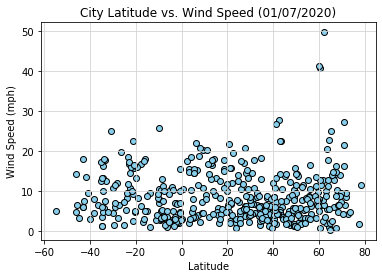

In [21]:
plt.scatter(df_weather["Lat"], df_weather["Wind Speed"], edgecolors = "black", facecolors="skyblue")
#plt.xlim(-60, 80)
#plt.ylim(0, 100)
plt.title("City Latitude vs. Wind Speed (" + today_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b = True, which = "major", axis = "both", linestyle = "-", color= "lightgrey")

plt.savefig("Output_Plots/LatitudeVsWindSpeedPlot.png")
plt.show()